#Ahmad Afif Aulia Hariz
username: ahmad_afif_a._hariz_6mkN

#Data Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
import zipfile
local_zip = '/content/drive/MyDrive/Colab Notebooks/seg_train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/seg_train')

['buildings', 'glacier', 'sea', 'street', 'mountain', 'forest']

In [5]:
print('total building images :', len(os.listdir('/tmp/seg_train/buildings')))
print('total glacier images :', len(os.listdir('/tmp/seg_train/glacier')))
print('total sea images :', len(os.listdir('/tmp/seg_train/sea')))
print('total street images :', len(os.listdir('/tmp/seg_train/street')))
print('total mountain images :', len(os.listdir('/tmp/seg_train/mountain')))
print('total forest images :', len(os.listdir('/tmp/seg_train/forest')))

total building images : 2191
total glacier images : 2404
total sea images : 2274
total street images : 2382
total mountain images : 2512
total forest images : 2271


#Data Preparation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('/tmp/seg_train')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2) # set validation split

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='sparse',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=128,
    class_mode='sparse',
    subset='validation')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


#Model Processing

In [75]:
'''
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
'''

"\nimport tensorflow as tf\nmodel = tf.keras.models.Sequential([\n    # Note the input shape is the desired size of the image 150x150 with 3 bytes color\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Dropout(0.4),  \n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), \n    tf.keras.layers.MaxPooling2D(2,2),\n    tf.keras.layers.Dropout(0.4),  \n    # Flatten the results to feed into a DNN\n    tf.keras.layers.Flatten(), \n    # 512 neuron hidden layer\n    tf.keras.layers.Dense(512, activation='relu'),\n    tf.keras.layers.Dense(256, activation='relu'),\n    tf.keras.layers.Dense(6, activation='softmax')  \n])\n"

In [95]:
import tensorflow as tf
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), kernel_initializer='he_uniform', padding='same'),
      tf.keras.layers.Activation('relu'),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(6, activation='softmax')
])

In [22]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(150,150,3), 
    include_top=False , weights= 'imagenet', input_tensor=None, pooling=None),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000 ,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1000 ,activation = 'relu'),
    tf.keras.layers.Dense(6 ,activation = 'softmax')
])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 5, 5, 2048)        23564800  
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          589856    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 32)                0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)             

In [27]:
#Call back technique 
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
            print("\nAccuracy dan val accuracy mencapai 85%!") 
            self.model.stop_training = True 

In [25]:
opt = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='SparseCategoricalCrossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [28]:
history = model.fit(train_generator, steps_per_epoch=44,                      
                              validation_data=validation_generator,
                              epochs=25,
                              verbose=1,
                              callbacks=[TestCallback()])

Epoch 1/25
44/44 [==============================] - 76s 2s/step - loss: 0.3384 - accuracy: 0.9036 - val_loss: 0.9256 - val_accuracy: 0.7193
Epoch 2/25
44/44 [==============================] - 75s 2s/step - loss: 0.3319 - accuracy: 0.8992 - val_loss: 0.8351 - val_accuracy: 0.7889
Epoch 3/25
44/44 [==============================] - 74s 2s/step - loss: 0.3204 - accuracy: 0.9069 - val_loss: 2.0222 - val_accuracy: 0.5688
Epoch 4/25
44/44 [==============================] - 74s 2s/step - loss: 0.3414 - accuracy: 0.9045 - val_loss: 0.4988 - val_accuracy: 0.8509

Accuracy dan val accuracy mencapai 85%!


In [29]:
model.evaluate(validation_generator)

22/22 [==============================] - 19s 871ms/step - loss: 0.4817 - accuracy: 0.8534


[0.4817211925983429, 0.8534236550331116]

#Ploting

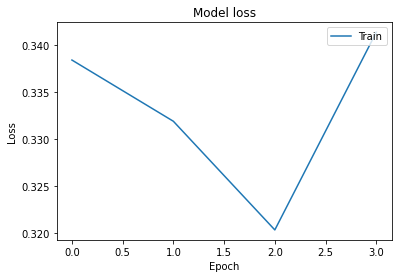

In [34]:
#Plot Loss dan Akurasi dari Trained Model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

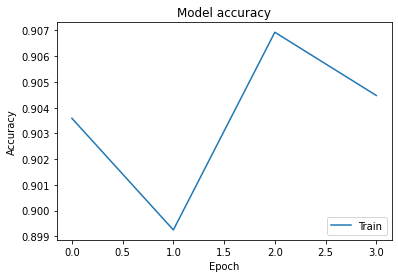

In [35]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

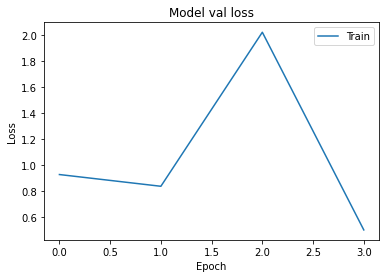

In [36]:
plt.plot(history.history['val_loss'])
plt.title('Model val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

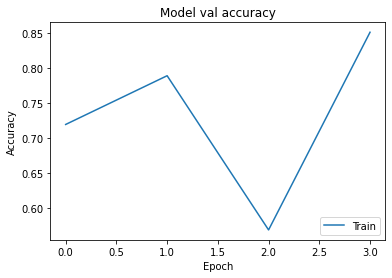

In [37]:
plt.plot(history.history['val_accuracy'])
plt.title('Model val accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

#Saving to TF-Lite

In [38]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmpg2kngb08/assets


In [39]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)